## Prerequisites

먼저 이번 과제에서 사용할 패키지들을 가져오도록 하겠습니다. 지난 과제와 마찬가지로, 우선 Numpy와 Pandas를 불러옵니다.

In [1]:
import numpy as np
import pandas as pd

MNIST 데이터의 경우 압축파일의 형태로 다운받아 처리할 수 있습니다. 그러나 이를 파이썬으로 처음부터 처리하기에는 귀찮은 점이 많습니다. 파이썬의 딥러닝 라이브러리들은 대부분 MNIST 데이터들을 자체적으로 가져오는 함수를 가지고 있습니다. 따라서 이번 과제에서는 다른 패키지를 통해 데이터를 가져오도록 하겠습니다. 특히 그 중에서도 Keras라는 라이브러리를 사용할 것입니다.

Keras는 Tensorflow라는 또 다른 딥러닝 라이브러리를 사용하기 편하게 만들어준 것입니다. 따라서 우리는 총 두 개, Tensorflow와 Keras를 설치할 것입니다. 사용하시는 환경에 따라서 설치하는데 시간이 좀 걸릴 수도 있으니 기다려주세요.

In [2]:
# 파이썬을 아나콘다로 설치한 경우, 아래 명령어 대신 아나콘다 네비게이터(Anaconda Navigator)를 실행한 뒤
# 좌측의 환경(Environment) 탭에서 설치할 수 있습니다.
!pip install tensorflow

In [3]:
# 파이썬을 아나콘다로 설치한 경우, 아래 명령어 대신 아나콘다 네비게이터(Anaconda Navigator)를 실행한 뒤
# 좌측의 환경(Environment) 탭에서 설치할 수 있습니다.
!pip install keras

## MNIST Dataset

이번 과제는 [MNIST 필기체 데이터셋](http://yann.lecun.com/exdb/mnist/)을 활용하여 필기체 이미지를 인식하는 이미지 인식 알고리즘을 Single-layer Neural Network로 작성합니다.

가로 28px, 세로 28px의 필기체 이미지가 주어지며, 필기체는 숫자 0부터 9까지 총 10개의 Label로 구성되어 있습니다. 이미지는 컬러가 없는 흑백 데이터이며, 한 픽셀의 값은 0 ~ 255 입니다. (0일수록 어둡고, 255일수록 밝습니다)

데이터는 60,000개의 Train 데이터와 10,000개의 Test 데이터가 주어지는데, Train 데이터로 Single-layer Neural Network를 학습한 뒤 Test 데이터로 정확도(accuracy)를 측정합니다. 각 변수의 세부 정보는 다음과 같습니다.

  * **X_train**: **Train 데이터의 Feature** 입니다. 가로 28px, 세로 28px, 총 60,000개의 데이터로 구성되어 있습니다. 픽셀 하나의 값은 0 ~ 255 입니다. (0일수록 어둡고, 255일수록 밝습니다)
  * **y_train**: **Train 데이터의 Label** 입니다. 총 60,000 개이며, 이미지가 어떤 숫자를 나타내는지가 적혀 있습니다. 값은 0부터 9까지 입니다.
  * **X_test**: **Test 데이터의 Feature** 입니다. 가로 28px, 세로 28px, 총 10,000개의 데이터로 구성되어 있습니다. 픽셀 하나의 값은 0 ~ 255 입니다. (0일수록 어둡고, 255일수록 밝습니다)
  * **y_test**: **Test 데이터의 Label** 입니다. 총 10,000 개이며, 이미지가 어떤 숫자를 나타내는지가 적혀 있습니다. 값은 0부터 9까지 입니다.
  
** 주의 사항 **
  * 이전에 Iris Dataset 문제를 풀었던 코드를 조금만 응용하면 매우 쉽게 MNIST 데이터셋 문제를 풀 수 있습니다.
  * accuracy가 잘 올라가지 않고 그 이유를 잘 모르겠다면, Loss Function(=Cross Entropy)를 병행해서 사용해보세요. 앞서 언급드린대로 Loss Function은 "학습이 잘 될수록 0에 수렴하고, 학습이 잘 되지 않을수록 무한대로 발산합니다." 즉, Loss Function을 사용할 때 결과가 무한대로 발산하고 있다면 무언가 제대로 풀리지 않고 있다는 것입니다.

위에서 다운받은 라이브러리로 MNIST 데이터를 불러오도록 하겠습니다. 데이터를 자체적으로 다운받아 처리하니 마찬가지로 시간이 좀 걸릴 수 있습니다.

In [4]:
from keras.datasets import mnist

((X_train, y_train), (X_test, y_test)) = mnist.load_data() # 데이터를 불러옵니다.

# 불러온 데이터가 어떠한 형태인지 출력합니다.
print(X_train.shape, X_test.shape)
print(y_train.shape, y_test.shape)

Using TensorFlow backend.


(60000, 28, 28) (10000, 28, 28)
(60000,) (10000,)


Train 데이터는 총 6만개, Test 데이터는 총 만 개가 있음을 볼 수 있습니다. 몇 개를 가져와 어떤 형태로 데이터가 생겼는지 확인해보겠습니다.

간단한 시각화를 위해서 matplotlib을 사용하도록 하겠습니다.

[5 0 4 1 9 2 1 3 1 4]


<Figure size 432x288 with 0 Axes>

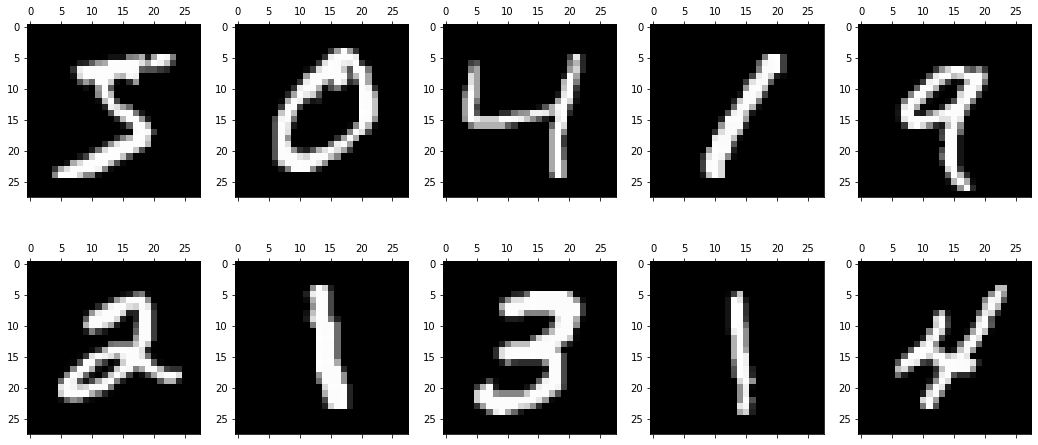

In [5]:
# matplotlib을 불러옵니다.
%matplotlib inline
import matplotlib.pyplot as plt

# mnist 데이터는 흑백의 데이터니 이를 명시해주겠습니다.
plt.gray()

# 비교를 위해서 정답 label을 가져옵니다. 곧 각 X는 각 y와 같아야합니다.
print(y_train[0:10])

# 10개를 가져와 시각화합니다.
figures, axes = plt.subplots(nrows=2, ncols=5)
figures.set_size_inches(18, 8)

axes[0][0].matshow(X_train[0])
axes[0][1].matshow(X_train[1])
axes[0][2].matshow(X_train[2])
axes[0][3].matshow(X_train[3])
axes[0][4].matshow(X_train[4])
axes[1][0].matshow(X_train[5])
axes[1][1].matshow(X_train[6])
axes[1][2].matshow(X_train[7])
axes[1][3].matshow(X_train[8])
axes[1][4].matshow(X_train[9])

lable은 0~9의 숫자로 저장되어 있다는 것을 확인할 수 있습니다.

## Preprocessing

본격적으로 학습을 시작하기 전에, 몇 가지 간단한 전처리를 해주겠습니다. Train과 Test의 데이터들은 28 x 28의 2차원 데이터입니다. 우리는 아직 2차원 등의 고차원 데이터를 다루는 법을 배우지 않았으므로, 여기에서는 2차원의 데이터를 1차원으로 처리해주도록 하겠습니다.

In [6]:
X_train = X_train.reshape(60000, 28 * 28) # X_train = (60000, 28, 28)입니다. 이를 1차원으로 바꿔줍니다
X_test = X_test.reshape(10000, 28 * 28)

print(X_train.shape, X_test.shape)

(60000, 784) (10000, 784)


이제 28x28의 2차원 데이터는 784의 1차원 데이터가 되었습니다. 이제는 Iris 데이터와 비슷한 방식으로 처리해줄 수 있죠. 손글씨가 어떤 숫자인지 확인할 수 있는 feature(column)가 총 784개 있다고 생각할 수 있습니다. 또한 저번과 마찬가지로 lable을 One-hot encoding해주도록 하겠습니다. 지난 과제에서는 Numpy를 이용해 이를 처리했는데요, Keras에도 비슷한 역할을 하는 함수가 있으니, 이번에는 이를 이용해보겠습니다.

In [7]:
from keras.utils import to_categorical

# One hot encoding을 합니다.
# y_train_hot = np.eye(10)[y_train]
y_train_hot = to_categorical(y_train)
# y_test_hot = np.eye(10)[y_test]
y_test_hot = to_categorical(y_test)

print(y_train_hot.shape)
print(y_test_hot.shape)

(60000, 10)
(10000, 10)


In [8]:
print(y_train[0:10])
print(y_train_hot[0:10])

[5 0 4 1 9 2 1 3 1 4]
[[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
 [0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]]


실행한 결과, One-hot encoding되어 있음을 볼 수 있습니다.

### Define Sigmoid

저번과 마찬가지로 시그모이드를 이용해 문제를 풀어보겠습니다. 시그모이드를 정의해줍니다.

In [9]:
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

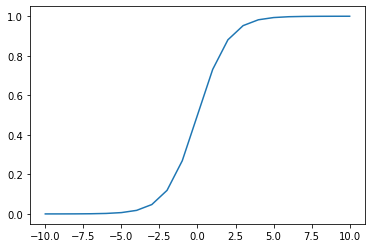

In [10]:
xx = np.linspace(-10, 10, num=21)
yy = sigmoid(xx)

plt.plot(xx, yy)

### Define Cross-Entropy

분류 문제에서는 Cross Entropy라는 Loss를 사용합니다. 이를 식으로 표현하면 아래와 같습니다.

$$\text{Cross Entropy} = \sum_i {- y_i * \log(\hat{y}_i)} $$

$y_i$는 0 또는 1의 값을 갖는, One-hot Encoding된 정답이며, $\hat{y}_i$는 네트워크가 만들어낸 예측치입니다. 정답일 때(곧 $y_i$가 1일 때) 우리의 모델이 예측한 값이 1에 가까울수록(곧 데이터가 이 분류에 속할 것이라고 예측한 확률이 1에 가까울수록) loss는 줄어들게 됩니다.

In [11]:
def cross_entropy(actual, predict, eps=1e-15):
    # 실제 값과 예측 값을 Numpy 배열로 바꿔줍니다.
    actual = np.array(actual)
    predict = np.array(predict)
    
    # 0이 log에 들어가게 되면 무한대로 발산해버릴 수 있으니  아주 작은 값을 넣어 이를 방지합니다.
    clipped_predict = np.minimum(np.maximum(predict, eps), 1 - eps)
    
    # 실질적인 Loss를 계산합니다
    loss = actual * np.log(clipped_predict) + (1 - actual) * np.log(1 - clipped_predict)
    
    return -1.0 * loss.mean()

### Gradient Descent

이제 본격적으로 학습을 진행하도록 해보겠습니다. 총 feature는 784개이며, 이 feature들을 이용해 우리는 10개의 lable(0~9) 중에 데이터가 어디에 속하는지를 예측해야 합니다.

In [34]:
num_epoch = 100
learning_rate = 1.0

num_data = X_train.shape[0]

w = np.random.uniform(low=-1.0, high=1.0, size=(10, 784)) # w와 b를 초기화합니다. 784개의 feature를 사용해 10개의 lable을 예측해야하므로 784, 10입니다
b = np.random.uniform(low=-1.0, high=1.0, size=(10, 1))

for epoch in range(num_epoch):
    # Write your code!
    y_predict_hot = np.dot(w, X_train.T) + b
    y_predict_hot = sigmoid(y_predict_hot)  # 시그모이드 대신 소프트맥스에 넣어줍니다.
    
    y_predict = np.argmax(y_predict_hot, axis = 0)  # 이를 argmax에 넣어 최종적으로 어떤 종에 속할지를 예측하도록
    accuracy = (y_predict == y_train).mean()  # 예측한 label과 실제 값이 일치하는지를 확인합니다.
    if accuracy > 0.8:
        break
    
    if epoch % 10 == 0:  # 일정 시간마다 학습 경과를 출력
        print(f"{epoch} accuracy = {accuracy:.6f}")
    
    w = w - learning_rate * np.dot((y_predict_hot - y_train_hot.T), X_train) / num_data  
    # dot product를 하면 시그마까지만 된것. 그래서 1/m을 적용하기 위해 num_data로 나눈다.
    b = b - learning_rate * (y_predict_hot - y_train_hot.T).mean(axis = 1, keepdims = True)
    # (3,)이런 모양이라 (3, 1)로 맞춰주기 위해 keepdims = True => 이렇게 안해주면 나중에 문제가 생길 수 있다.
    
print('---' * 10)
print(f"{epoch} accuracy = {accuracy:.6f}")

/Users/choehansol/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: RuntimeWarning: overflow encountered in exp
  


0 accuracy = 0.114067
10 accuracy = 0.644517
20 accuracy = 0.759667
------------------------------
28 accuracy = 0.816067


## Evaluate

학습이 끝났으니 모델이 잘 동작하고 있는지 확인해봅시다.

### Train

pandas를 이용해 실제 정답과 예측치를 비교하고, 정확도를 계산해봅니다.

In [35]:
# y의 예측치를 만들어냅니다.
y_predict_hot = np.dot(w, X_train.T) + b
y_predict_hot = sigmoid(y_predict_hot)
    
y_predict = np.argmax(y_predict_hot, axis = 0)

# 새로운 DataFrame을 만들어 실제값과 예측치를 저장합니다.
train_result = pd.DataFrame({'actual': y_train, 'predict': y_predict})

# 정확도를 계산합니다.
train_accuracy = (train_result["actual"] == train_result["predict"]).mean()

print("Accuracy(train) = {0:.5f}".format(train_accuracy))

print(train_result.shape)
train_result.head(10)

Accuracy(train) = 0.81607
(60000, 2)


/Users/choehansol/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: RuntimeWarning: overflow encountered in exp
  


,actual,predict
0,5,3
1,0,0
2,4,4
3,1,1
4,9,9
5,2,2
6,1,1
7,3,3
8,1,1
9,4,4


### Test

Test 데이터는 학습 과정에서는 보지못한 새로운 데이터입니다. 이러한 데이터에 대해서도 정확하게 동작하는지 확인해봅시다.

In [36]:
# y에 대한 예측값을 만들어냅니다.
y_predict_hot = np.dot(w, X_test.T) + b
y_predict_hot = sigmoid(y_predict_hot)
    
y_predict = np.argmax(y_predict_hot, axis = 0)

# 위와 마찬가지로 결과를 저장합니다.
test_result = pd.DataFrame({'actual': y_test, 'predict': y_predict})

# 정확도를 계산합니다.
test_accuracy = (test_result["actual"] == test_result["predict"]).mean()

print("Accuracy(test) = {0:.5f}".format(test_accuracy))

print(test_result.shape)
test_result.head(10)

Accuracy(test) = 0.81470
(10000, 2)


/Users/choehansol/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: RuntimeWarning: overflow encountered in exp
  


,actual,predict
0,7,7
1,2,2
2,1,1
3,0,0
4,4,4
5,1,1
6,4,4
7,9,9
8,5,0
9,9,9
